In [8]:
# use only numpy , pandas , matplotlib
import numpy as np  # used for maths stuff 
import pandas as pd # used for data handling
import matplotlib.pyplot as plt # used for graphing purposes 

In [9]:
# load the data 
df=pd.read_csv("Dummy Data HSS.csv")
print(df.isnull().sum())
# handle the nans in the df
# here in the data of 4000+ , we only have few nans , so we can just ignore those rows instead of trying to fill those rows 
df=df[~df.isna().any(axis=1)]
print(df.isnull().sum())
print(df.shape)
print(df["Influencer"].value_counts())
df=df.dropna()
df=df.copy()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64
TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64
(4546, 5)
Influencer
Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: count, dtype: int64


In [10]:
# now there is string col in the input csv --> we need to deal with it --> what we will do is convert it --> using mapping
# we will assign the values based on the freq of that word in the whole of the csv
mapping={"Mega":4,"Micro":3,"Nano":2,"Macro":1}
df["Influencer"]=df["Influencer"].map(mapping)
print(df)

        TV      Radio  Social Media  Influencer       Sales
0     16.0   6.566231      2.907983           4   54.732757
1     13.0   9.237765      2.409567           4   46.677897
2     41.0  15.886446      2.913410           4  150.177829
3     83.0  30.020028      6.922304           4  298.246340
4     15.0   8.437408      1.405998           3   56.594181
...    ...        ...           ...         ...         ...
4567  26.0   4.472360      0.717090           3   94.685866
4568  71.0  20.610685      6.545573           2  249.101915
4569  44.0  19.800072      5.096192           3  163.631457
4570  71.0  17.534640      1.940873           1  253.610411
4571  42.0  15.966688      5.046548           3  148.202414

[4546 rows x 5 columns]


In [11]:

# sepration of the target and other variables and convert them to matrices --> further directly we will use matrices multiplication
x=df.drop(columns=["Sales"]).to_numpy()
y=df["Sales"].to_numpy()
print(x,y,x.shape,y.shape)
# so here we have our x as some (n,4) and y as (n,) , note :--> 0 is a index aswell



[[16.          6.56623079  2.90798277  4.        ]
 [13.          9.23776457  2.4095672   4.        ]
 [41.         15.88644602  2.91341018  4.        ]
 ...
 [44.         19.80007236  5.09619187  3.        ]
 [71.         17.5346403   1.94087322  1.        ]
 [42.         15.96668752  5.04654763  3.        ]] [ 54.73275715  46.67789698 150.1778288  ... 163.6314574  253.6104113
 148.2024141 ] (4546, 4) (4546,)


In [12]:

class LinearRegression:
  
  def __init__(self,learning_rate,batch_size,epochs):   #our hyper-parameters
    self.lr=learning_rate  #float
    self.bs=batch_size     #int
    self.weights=None      #arr[int]
    self.biases=None       #arr[int]
    self.ep=epochs         #int

  def fit(self,x,y):
    # we have our x as (n,4) mat , and then we will need our output y_hat as a (n,) matrix too 
    # our baises will be a (n,) mat (its just scalar -- keep in mind), the code will itself do the broadcasting thing (numpy)
    # w will be a (4,) matrix 
    # no need to tranpose x as its already in the form we need it 
    # we initialize the weights and baises to 0 
    self.weights=np.zeros(x.shape[1],) # this will be initialised 
    self.biases=0                      # this is just scalar , so direcly works 
    for ep in range (self.ep):  # this will be we running iterations 
     for i in range(0,len(x),self.bs):
       # now we will convert to batches --> kinda small groups --> keep the shape in mind
       # python slicing never goes beyond limits , so writing for the bounds doesnt matter
       batch_x=x[i:i+self.bs] # from index i to i+self.bs
       batch_y=y[i:i+self.bs] # actual y values for that       

       # now for this batch we calc our y_hat 
       y_hat=np.dot(batch_x,self.weights)+self.biases 

       # note when we batched 
       # we changed the no. of rows 
       # that is the batch_x become a (k,4) 
       # so we dont have any change in the no. of cols anyways

       # now we calculate the gradient of the weights and the baises
       grad_w=(-2/len(batch_x))*(np.dot(batch_x.T,(batch_y-y_hat))) # the weight gradient formula , note here we need to take tranpose of x to make it (4,k)
       grad_b=(-2/len(batch_x))*(np.sum(batch_y-y_hat))  # the formula is summation --> note:-- this is the scalar 
       self.weights -= self.lr*grad_w       # for each batch we update it
       self.biases  -= self.lr*grad_b 


  def predict(self,x):
    return np.dot(x,self.weights)+self.biases     # this will return the y_hat matrix --> (n,)
      
      


In [13]:
# for using the below we need to split data into train and testing sizes 
x_train=x[:int(len(x)*0.8)]  # we do the int type-casting for the index
y_train=y[:int(len(y)*0.8)]  # int type-casting for the index
model=LinearRegression(learning_rate=0.0001,epochs=2000,batch_size=40)
model.fit(x_train,y_train) 
print(model.weights)
print(model.biases)  

[ 3.5660128  -0.00910877  0.0154006  -0.00670412]
-0.1510538074014403


In [14]:
x_test=x[int(len(x)*0.8):]
actual=y[int(len(y)*0.8):]
prediction=model.predict(x_test)
MSE=np.mean((actual-prediction)**2) #mean_squared_error
print(MSE)


8.996508468284127


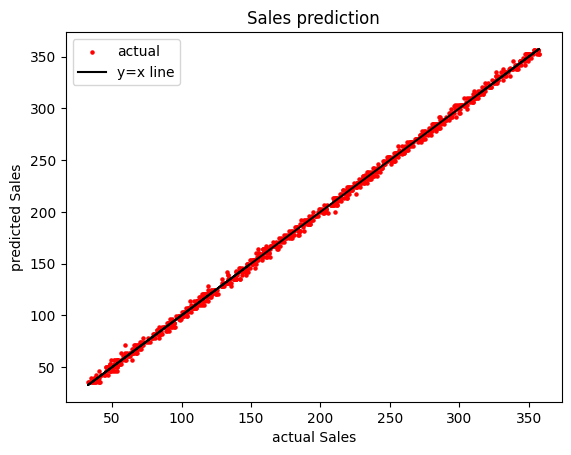

In [ ]:
plt.scatter(actual,prediction,color='red',label='actual',s=5)
plt.plot(actual,actual,color='black',label='y=x line')
plt.title("Sales prediction")
plt.ylabel("predicted Sales")
plt.xlabel("actual Sales")
plt.legend()
plt.show()
#ideally all points should be on the y=x line , so we have MSE=0 